In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

import time

import lightgbm

from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error

from matplotlib.pyplot import figure

from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import learning_curve
from sklearn.kernel_ridge import KernelRidge

%matplotlib inline

In [3]:
rep_cols = {'ID':'ID', 
 '板温':'board_t', 
 '现场温度':'env_t', 
 '光照强度':'light_strength', 
 '转换效率':'efficiency', 
 '转换效率A':'efficiency_A', 
 '转换效率B':'efficiency_B', 
 '转换效率C':'efficiency_C', 
 '电压A':'V_A',
 '电压B':'V_B', 
 '电压C':'V_C', 
 '电流A':'I_A', 
 '电流B':'I_B', 
 '电流C':'I_C', 
 '功率A':'P_A', 
 '功率B':'P_B', 
 '功率C':'P_C', 
 '平均功率':'P_avg', 
 '风速':'wind_speed',
 '风向':'wind_direction', 
 '发电量':'y'
}

In [4]:
def my_val(preds, train_data):
    label = train_data.get_label()
    return 'score', 1/(1+np.sqrt(mean_squared_error(preds, label))), True
def my_obj(preds, train_data):
    labels = train_deata.get_label()

In [5]:
train = pd.read_csv('../data/public_raw.train.csv')
test = pd.read_csv('../data/public_raw.test.csv')

train_len = train.shape[0]

train['is_train']=1
test['is_train']=0

df = pd.concat([train, test],sort=False)

In [6]:
df.rename(index=str, columns=rep_cols, inplace=True)

df.sort_values(by=['ID'],ascending=True, inplace=True)

df.reset_index(drop=True, inplace=True)

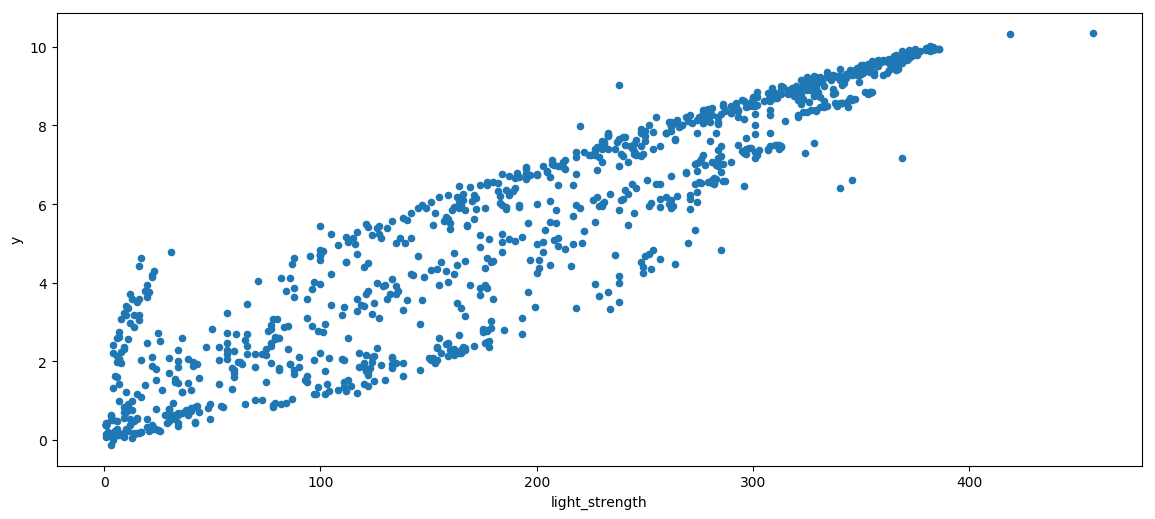

In [37]:
#问题一：发电量和光照强度什么关系？
y_ls=df.head(2000)

figure(num=None, figsize=(14, 6), dpi=100, facecolor='w', edgecolor='k')

ax = plt.gca()

y_ls.plot.scatter(x='light_strength',y='y',ax=ax)
# inter_y_id.plot(x='ID',y='y',ylim=(-1,14),ax=ax)

plt.show()

In [41]:
#问题：为什么存在辐照强度小但是发电量大的现象？

low_ls_high_y_df = df[(df['light_strength']<50)&(df['y']>2)]
low_ls_high_y_df[['ID','board_t','light_strength','I_A','V_A','V_B','V_C','y']]

,ID,board_t,light_strength,I_A,V_A,V_B,V_C,y
156,164,1.91,20,2.69,692,695,693,3.943036
158,166,1.56,16,2.52,691,691,690,3.581688
161,169,0.74,14,2.28,692,692,691,3.186497
162,170,0.37,12,2.19,690,692,691,2.981898
163,171,-0.43,11,1.89,689,690,692,2.570409
164,172,-1.02,9,1.81,687,687,689,2.373425
165,173,-1.56,8,1.70,689,690,692,2.239783
166,174,-2.31,7,1.61,688,686,686,2.049708
328,352,6.95,23,3.02,678,678,680,4.286982
329,353,6.87,22,2.95,679,679,676,4.202430


In [45]:
df[df['is_train']==1][['ID','board_t','light_strength','I_A','V_A','V_B','V_C','y']].head(100)

,ID,board_t,light_strength,I_A,V_A,V_B,V_C,y
2,10,-19.14,34,1.34,729,709,725,1.437752
3,11,-18.73,30,1.55,728,717,726,1.692575
4,12,-17.54,41,1.75,731,722,720,1.975787
6,14,-15.43,53,2.02,730,727,726,2.370656
7,15,-14.60,65,2.13,727,729,728,2.532091
8,16,-14.10,76,2.21,733,728,724,2.779719
11,19,-11.25,96,2.57,726,726,725,3.832378
12,20,-10.77,100,2.65,726,720,721,3.956692
14,22,-10.77,100,7.19,65382,7,107,5.440741
16,24,-8.33,122,2.96,721,717,717,4.501339


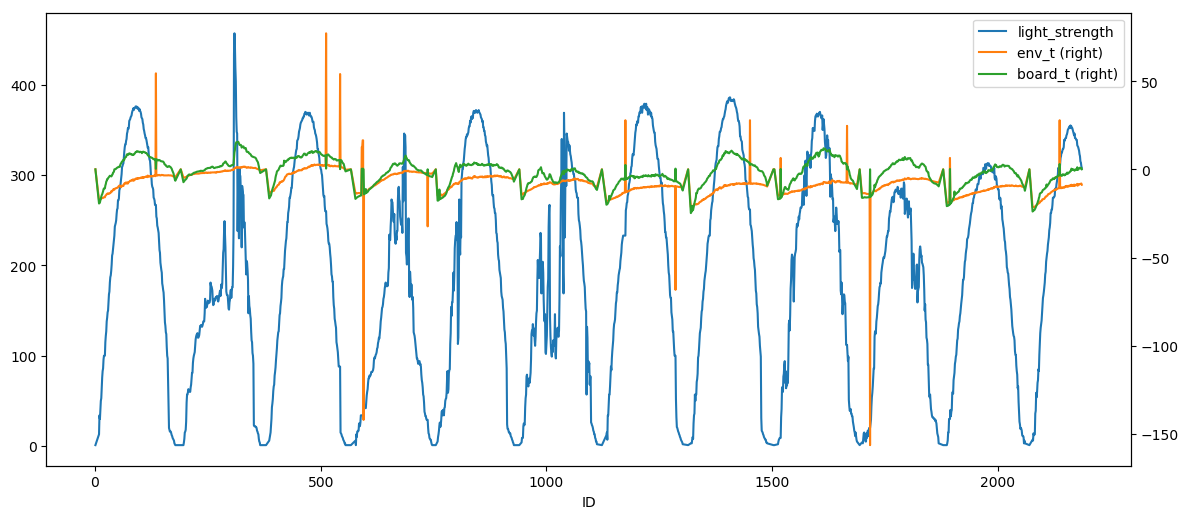

In [73]:
#问题二：如果已知训练集和测试集的数据是一系列实验的输出，实验是如何控制变量的？
#其中，根据特征重要度，最关键的物理量如下：I_A，I_B，I_C，light_strength，V_A，V_B，V_C，board_t，env_t
figure(num=None, figsize=(14, 6), dpi=100, facecolor='w', edgecolor='k')

ax = plt.gca()

dfp=df.head(2000)
dfp.plot(x='ID',y='light_strength',ax=ax)
dfp.plot(x='ID',y='env_t',secondary_y=True,label='env_t',ax=ax)
dfp.plot(x='ID',y='board_t',secondary_y=True,label='board_t',ax=ax)

plt.show()

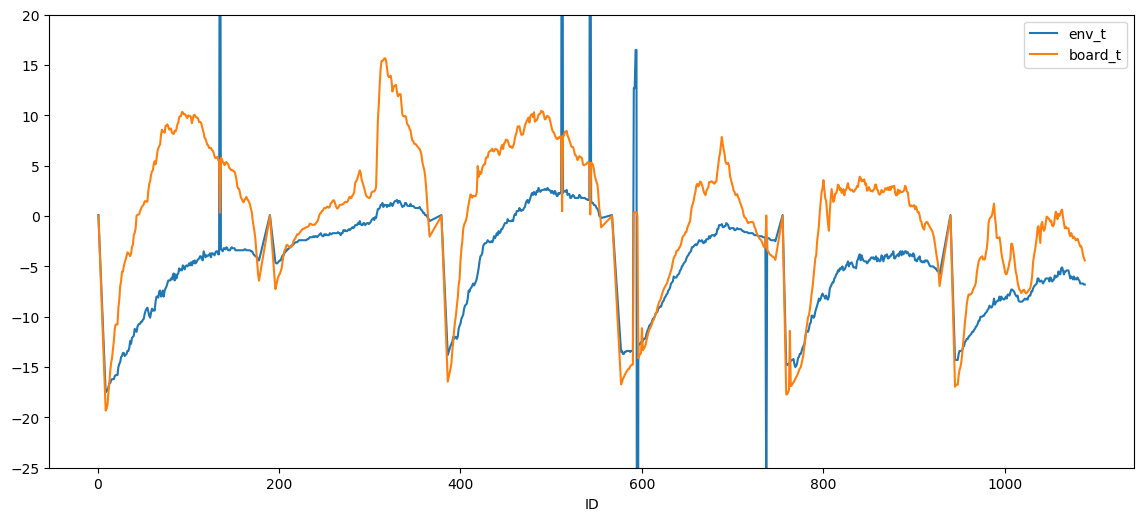

环境温度分布：
count    17409.000000
mean        -0.582561
std         69.042008
min      -6414.200000
25%         -7.500000
50%         -2.400000
75%          8.300000
max         78.700000
Name: env_t, dtype: float64
板温度分布：
count    17409.000000
mean         6.723067
std         11.737906
min        -24.790000
25%         -1.830000
50%          5.600000
75%         15.540000
max         36.800000
Name: board_t, dtype: float64


In [85]:
#问题2.1：board_t和env_t的关系？

figure(num=None, figsize=(14, 6), dpi=100, facecolor='w', edgecolor='k')

ax = plt.gca()

dfp=df.head(1000)
dfp.plot(x='ID',y='env_t',ylim=(-25,20),label='env_t',ax=ax)
dfp.plot(x='ID',y='board_t',label='board_t',ax=ax)

plt.show()

# print("环境温度分布："+df['env_t'].describe())
print("环境温度分布：")
print(df['env_t'].describe())
print("板温度分布：")
print(df['board_t'].describe())

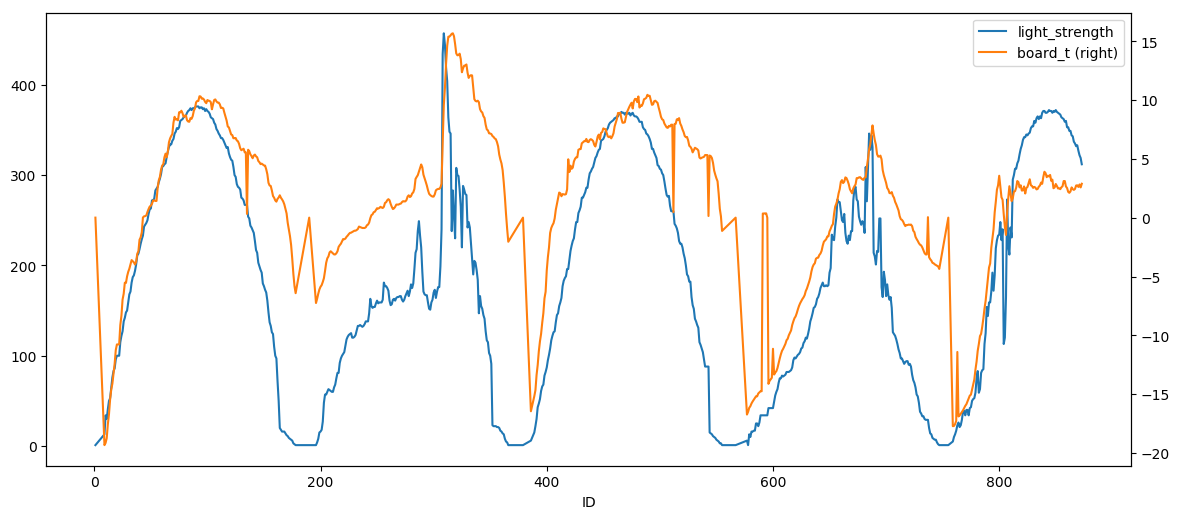

辐照强度分布：
count    17409.000000
mean       340.181975
std        220.129925
min          0.000000
25%        154.000000
50%        313.000000
75%        527.000000
max        941.000000
Name: light_strength, dtype: float64


In [88]:
#问题2.2：board_t和light_strength的关系？
#回答2.2：两种可能，一、板温度是主动控制的结果，但是图中反映的情况是1）温度的变化趋势很不平滑2）温度的周期性略有滞后于光照，因此不倾向于此猜测
#二、板温度是电路板发热的被动结果，倾向于此种猜测

figure(num=None, figsize=(14, 6), dpi=100, facecolor='w', edgecolor='k')

ax = plt.gca()

dfp=df.head(800)
dfp.plot(x='ID',y='light_strength',ax=ax)
dfp.plot(x='ID',y='board_t',secondary_y=True,label='board_t',ax=ax)

plt.show()

print("辐照强度分布：")
print(df['light_strength'].describe())

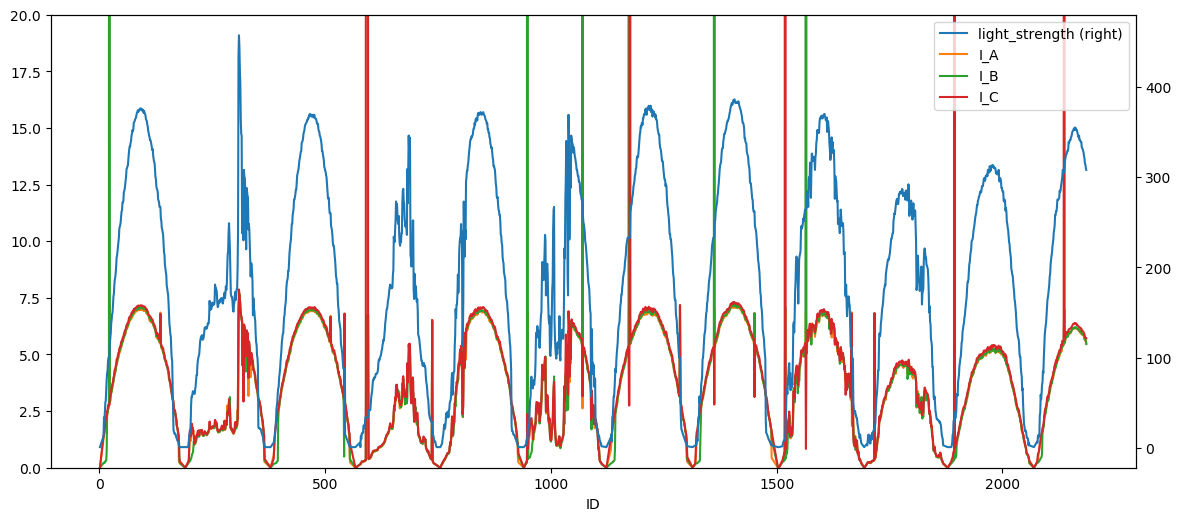

A电流分布：
count    17409.000000
mean         4.122806
std          2.570463
min          0.000000
25%          1.740000
50%          4.040000
75%          6.480000
max          9.570000
Name: I_A, dtype: float64


In [97]:
#问题2.3：ABC三处电流和light_strength的关系？
#回答2.3：

figure(num=None, figsize=(14, 6), dpi=100, facecolor='w', edgecolor='k')

ax = plt.gca()

dfp=df.head(2000)
dfp.plot(x='ID',y='light_strength',secondary_y=True,ax=ax)
dfp.plot(x='ID',y='I_A',ylim=(0,20),label='I_A',ax=ax)
dfp.plot(x='ID',y='I_B',ylim=(0,20),label='I_B',ax=ax)
dfp.plot(x='ID',y='I_C',ylim=(0,20),label='I_C',ax=ax)

plt.show()

print("A电流分布：")
print(df['I_A'].describe())

In [100]:
#问题2.4：ABC三处电流的关系？
#回答2.4：可以认为相等


print("AB电流差分布：")
print((df['I_A']-df['I_B']).describe())

print("AC电流差分布：")
print((df['I_A']-df['I_C']).describe())

print("BC电流差分布：")
print((df['I_B']-df['I_C']).describe())


AB电流差分布：
count    17409.000000
mean        -0.433087
std         16.091693
min       -651.090000
25%         -0.050000
50%          0.000000
75%          0.050000
max          6.950000
dtype: float64
AC电流差分布：
count    17409.000000
mean        -0.640878
std         18.721761
min       -645.090000
25%         -0.180000
50%         -0.080000
75%         -0.010000
max          7.060000
dtype: float64
BC电流差分布：
count    17409.000000
mean        -0.207791
std         24.738070
min       -645.070000
25%         -0.160000
50%         -0.080000
75%         -0.010000
max        652.400000
dtype: float64


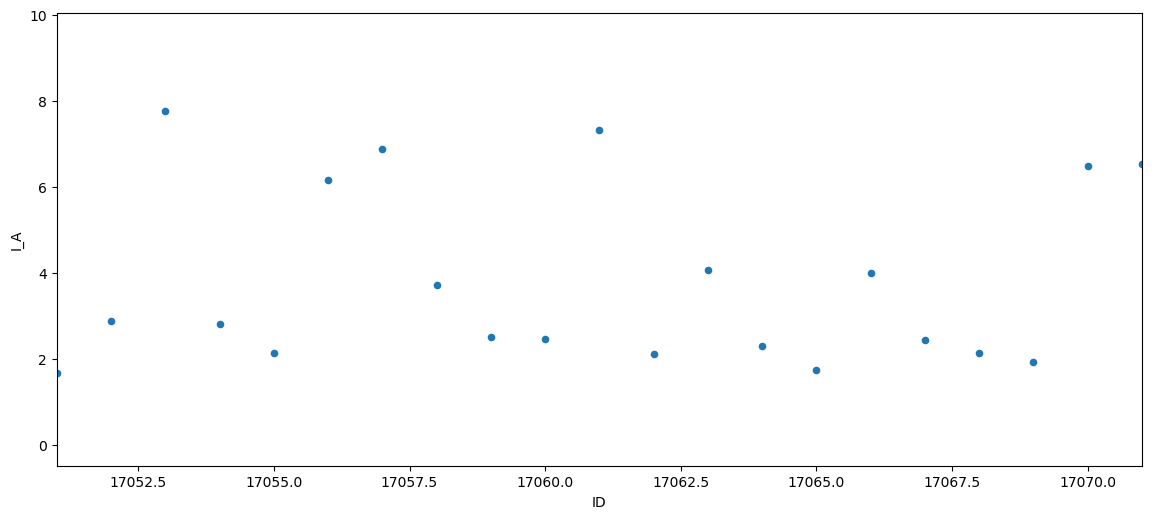

In [63]:
#问题2.5：电流和light_strength的关系？
#回答2.5：

figure(num=None, figsize=(14, 6), dpi=100, facecolor='w', edgecolor='k')

ax = plt.gca()

dfp=df
# dfp.plot(x='ID',y='light_strength',secondary_y=True,ax=ax)
# dfp.plot(x='ID',y='I_A',ylim=(0,20),label='I_A',ax=ax)

# dfp.plot(x='ID',y='y',label='y',ax=ax)

dfp.plot.scatter(x='ID',xlim=(17061-10,17061+10),y='I_A',ax=ax)

plt.show()

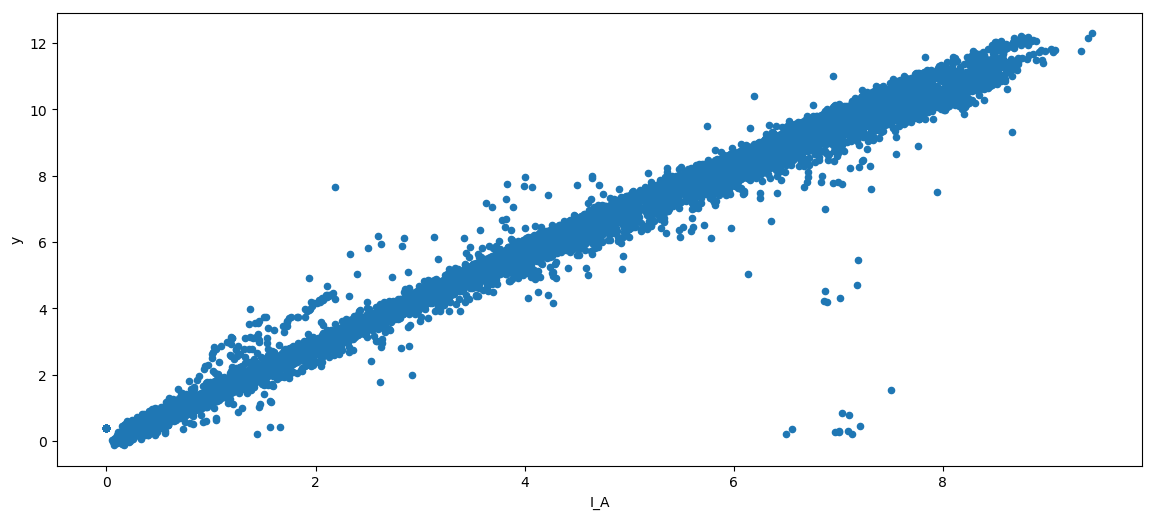

In [25]:
#问题2.5：电流和light_strength的关系？
#回答2.5：

figure(num=None, figsize=(14, 6), dpi=100, facecolor='w', edgecolor='k')

ax = plt.gca()

dfp=df
# dfp.plot(x='ID',y='light_strength',secondary_y=True,ax=ax)
# dfp.plot(x='ID',y='I_A',ylim=(0,20),label='I_A',ax=ax)

# dfp.plot(x='ID',y='y',label='y',ax=ax)

dfp.plot.scatter(x='I_A',y='y',ax=ax)

plt.show()

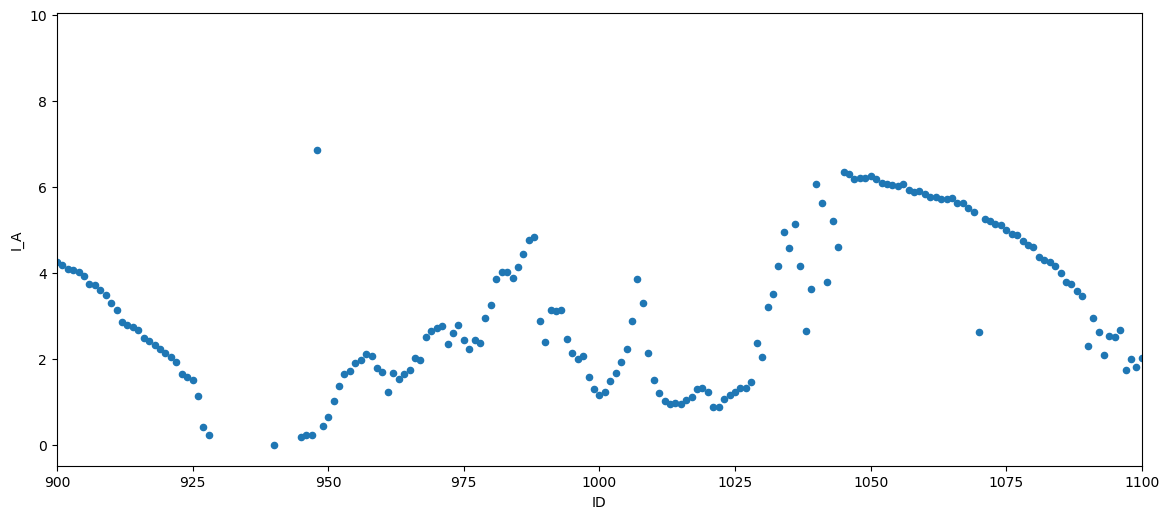

In [35]:
#问题：为什么会出现电流很大，但辐照强度和发电量很小的情况？
#ID 1894 所在周期
figure(num=None, figsize=(14, 6), dpi=100, facecolor='w', edgecolor='k')

ax = plt.gca()

df.plot.scatter(x='ID',xlim=(1000-100,1000+100),y='I_A',ax=ax)
# df.plot.scatter(x='ID',y='I_A',ax=ax)


#答案：电流也有异常值！


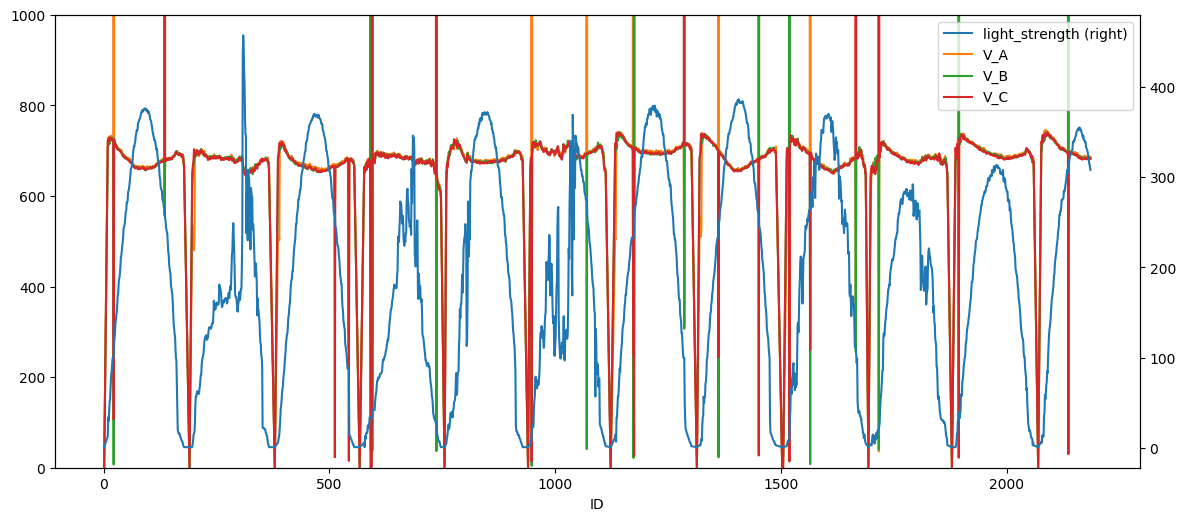

A电压分布：
count    17409.000000
mean       705.609570
std       1701.092389
min          0.000000
25%        641.000000
50%        669.000000
75%        689.000000
max      65515.000000
Name: V_A, dtype: float64
B电压分布：
count    17409.000000
mean       740.040956
std       2302.192020
min          0.000000
25%        638.000000
50%        666.000000
75%        686.000000
max      65512.000000
Name: V_B, dtype: float64
C电压分布：
count    17409.000000
mean       706.014762
std       1771.669523
min          0.000000
25%        638.000000
50%        666.000000
75%        686.000000
max      65514.000000
Name: V_C, dtype: float64


In [108]:
#问题2.6：ABC三处电压和light_strength的关系？
#回答2.6：

figure(num=None, figsize=(14, 6), dpi=100, facecolor='w', edgecolor='k')

ax = plt.gca()

dfp=df.head(2000)
dfp.plot(x='ID',y='light_strength',secondary_y=True,ax=ax)
dfp.plot(x='ID',y='V_A',ylim=(0,1000),label='V_A',ax=ax)
dfp.plot(x='ID',y='V_B',label='V_B',ax=ax)
dfp.plot(x='ID',y='V_C',label='V_C',ax=ax)

plt.show()

print("A电压分布：")
print(df['V_A'].describe())

print("B电压分布：")
print(df['V_B'].describe())

print("C电压分布：")
print(df['V_C'].describe())

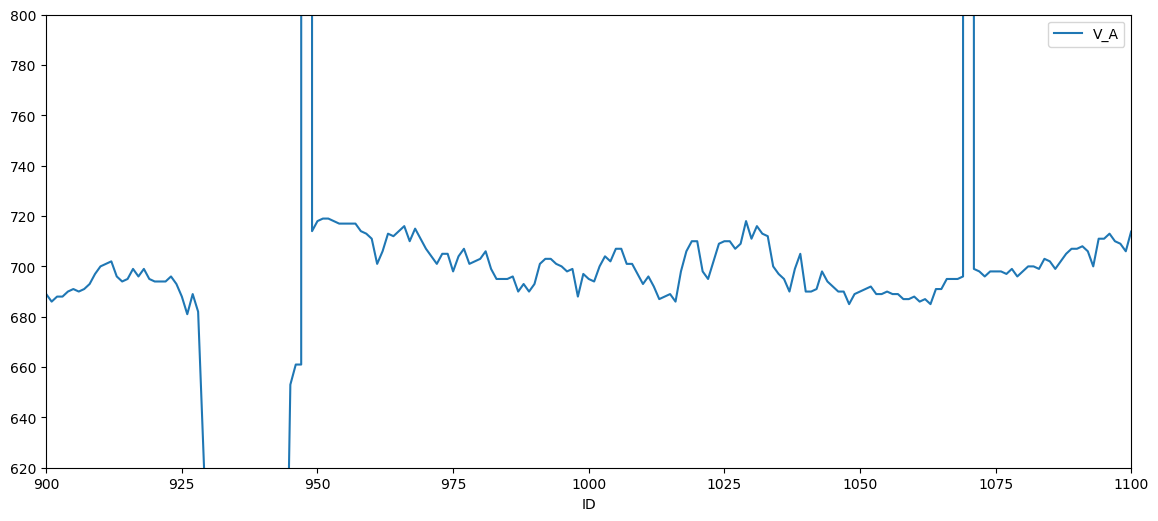

AB电压差分布：
count    17409.000000
mean       -34.431386
std       2882.772965
min     -65427.000000
25%          0.000000
50%          2.000000
75%          4.000000
max      65515.000000
dtype: float64
AC电压差分布：
count    17409.000000
mean        -0.405193
std       2472.915389
min     -65477.000000
25%          1.000000
50%          3.000000
75%          5.000000
max      65426.000000
dtype: float64
BC电压差分布：
count    17409.000000
mean        34.026193
std       2930.183984
min     -65477.000000
25%         -1.000000
50%          1.000000
75%          2.000000
max      65495.000000
dtype: float64


In [22]:
#问题2.7：ABC三处电压的关系？
#回答2.7：可以认为相等

figure(num=None, figsize=(14, 6), dpi=100, facecolor='w', edgecolor='k')

ax = plt.gca()

dfp=df
dfp.plot(x='ID',xlim=(900,1100),y='V_A',ylim=(620,800),label='V_A',ax=ax)
# dfp.plot(x='ID',y='V_B',label='V_B',ax=ax)
# dfp.plot(x='ID',y='V_C',label='V_C',ax=ax)

plt.show()


print("AB电压差分布：")
print((df['V_A']-df['V_B']).describe())

print("AC电压差分布：")
print((df['V_A']-df['V_C']).describe())

print("BC电压差分布：")
print((df['V_B']-df['V_C']).describe())

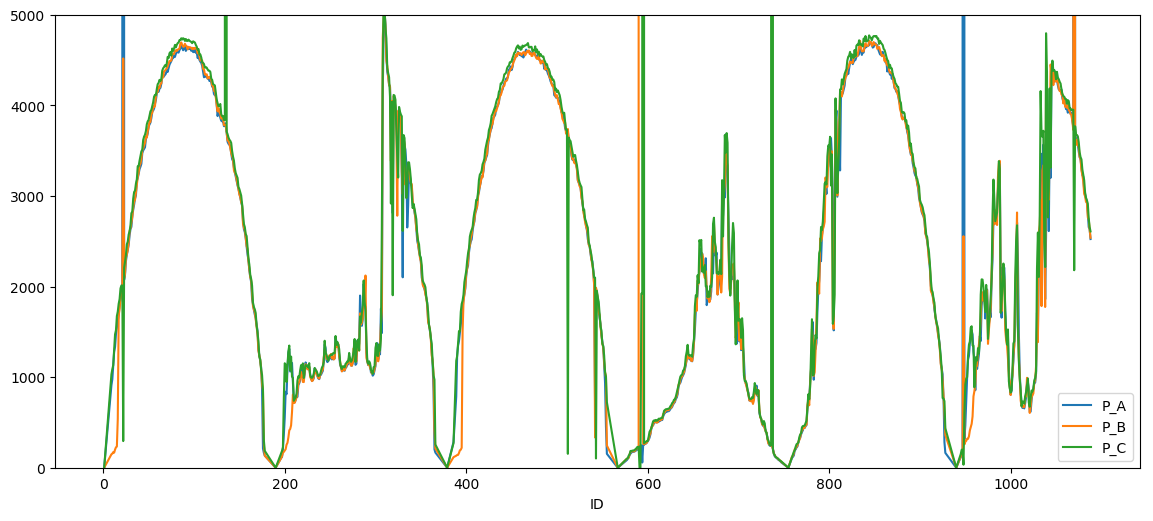

A分布：
count     17409.000000
mean       3008.554699
std       11618.226049
min           0.000000
25%        1189.000000
50%        2722.400000
75%        4253.850000
max      470096.580000
Name: P_A, dtype: float64
B分布：
count     17409.000000
mean       3278.509465
std       15962.164468
min           0.000000
25%        1167.250000
50%        2767.500000
75%        4264.910000
max      603301.050000
Name: P_B, dtype: float64
C分布：
count     17409.000000
mean       3093.410124
std       12161.006184
min           0.000000
25%        1227.600000
50%        2762.890000
75%        4326.920000
max      469844.840000
Name: P_C, dtype: float64
AB差分布：
count     17409.000000
mean       -269.954766
std       19573.167110
min     -597991.730000
25%         -21.380000
50%           6.470000
75%          43.280000
max      465578.850000
dtype: float64
AC差分布：
count     17409.000000
mean        -84.855425
std       16729.458710
min     -467619.040000
25%        -100.010000
50%         -42.270000
75% 

In [117]:
#问题2.8：ABC三处功率的关系？
#回答2.8：可以认为相等

figure(num=None, figsize=(14, 6), dpi=100, facecolor='w', edgecolor='k')

ax = plt.gca()

dfp=df.head(1000)
dfp.plot(x='ID',y='P_A',ylim=(0,5000),label='P_A',ax=ax)
dfp.plot(x='ID',y='P_B',label='P_B',ax=ax)
dfp.plot(x='ID',y='P_C',label='P_C',ax=ax)

plt.show()

print("A分布：")
print(df['P_A'].describe())

print("B分布：")
print(df['P_B'].describe())

print("C分布：")
print(df['P_C'].describe())

print("AB差分布：")
print((df['P_A']-df['P_B']).describe())

print("AC差分布：")
print((df['P_A']-df['P_C']).describe())

print("BC差分布：")
print((df['P_B']-df['P_C']).describe())

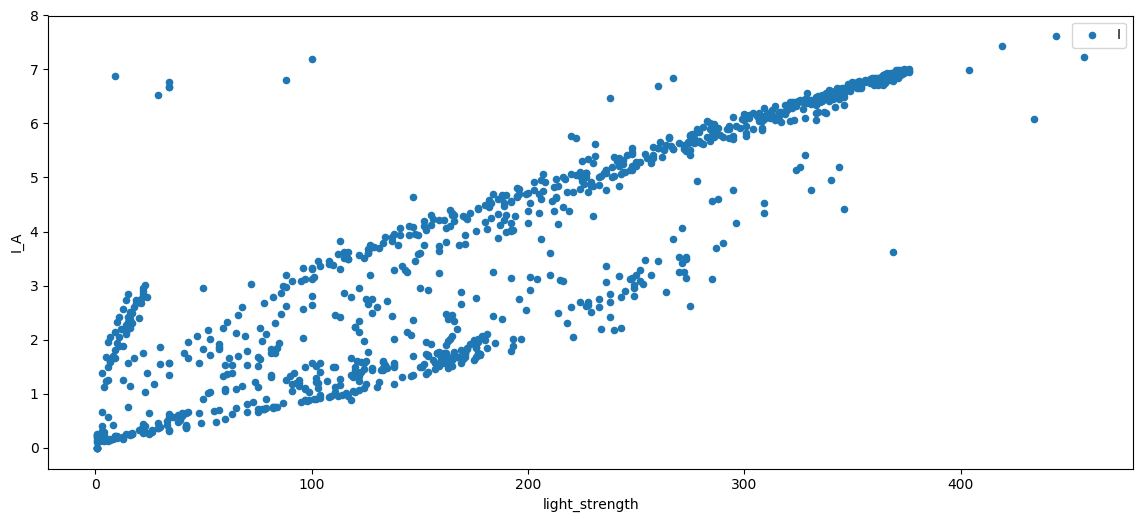

In [122]:
#问题2.9：A电流电压与辐照强度的关系？
#回答2.9：


figure(num=None, figsize=(14, 6), dpi=100, facecolor='w', edgecolor='k')

ax = plt.gca()

dfp=df.head(1000)
dfp.plot.scatter(x='light_strength',y='I_A',label='I',secondary_y=True,ax=ax)
# dfp.plot.scatter(x='light_strength',y='V_A',label='U',ylim=(620,800),ax=ax)


plt.show()

In [20]:
df[(df['ID']<15355+25) & (df['ID']>15355-25) ][['ID','y']]

,ID,y
14865,15331,NaN
14866,15332,7.826322
14867,15333,7.978552
14868,15334,8.227259
14869,15335,5.017695
14870,15336,NaN
14871,15337,NaN
14872,15338,NaN
14873,15339,8.764451
14874,15340,NaN


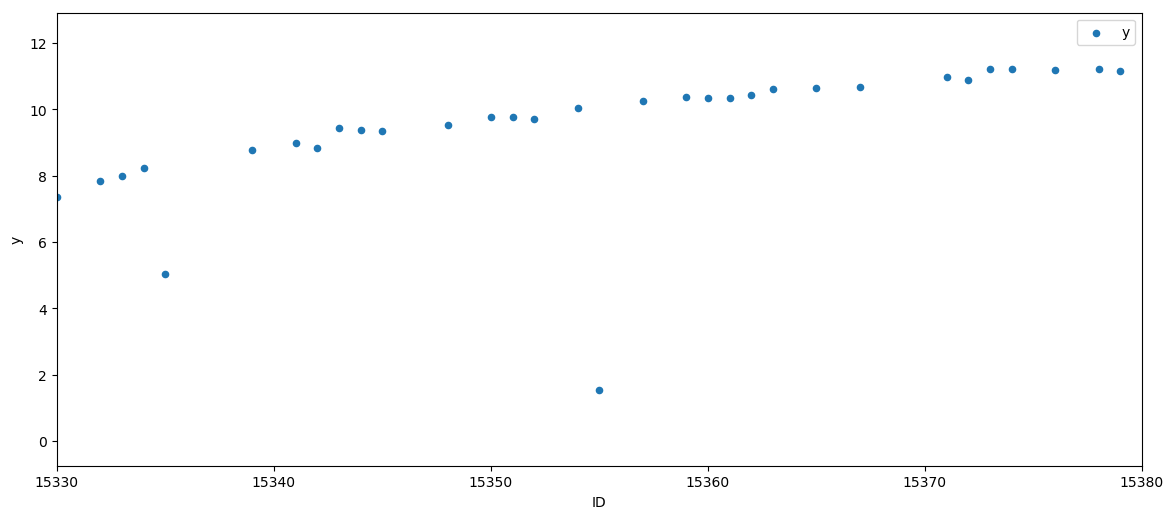

In [15]:
#问题3：15355所在周期为何如此异常？
#回答3：


figure(num=None, figsize=(14, 6), dpi=100, facecolor='w', edgecolor='k')

ax = plt.gca()

dfp=df
dfp.plot.scatter(x='ID',xlim=(15355-25,15355+25),y='y',label='y',ax=ax)
# dfp.plot.scatter(x='light_strength',y='V_A',label='U',ylim=(620,800),ax=ax)


plt.show()

In [23]:
train = df[df['is_train']==1]
test = df[df['is_train']==0]

x=train[['ID']]
y=train[['y']]

In [58]:
# Fit regression model
# train_size = 100
# svr = GridSearchCV(SVR(kernel='rbf', gamma=0.1), cv=5,
#                    param_grid={"C": [1e0, 1e1, 1e2, 1e3],
#                                "gamma": np.logspace(-2, 2, 5)})
svr = GridSearchCV(SVR(kernel='rbf', gamma=0.1), cv=5,
                   param_grid={"C": [1e0, 1e1],
                               "gamma": np.logspace(-2, 2)})

# svr = SVR(kernel='rbf', gamma=0.1)


# kr = GridSearchCV(KernelRidge(kernel='rbf', gamma=0.1), cv=5,
#                   param_grid={"alpha": [1e0, 0.1, 1e-2, 1e-3],
#                               "gamma": np.logspace(-2, 2, 5)})



t0 = time.time()
svr.fit(x, y)
svr_fit = time.time() - t0
print("SVR complexity and bandwidth selected and model fitted in %.3f s"
      % svr_fit)

C:\Users\Alex\Anaconda3\envs\python36\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Alex\Anaconda3\envs\python36\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Alex\Anaconda3\envs\python36\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Alex\Anaconda3\envs\python36\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expec

C:\Users\Alex\Anaconda3\envs\python36\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Alex\Anaconda3\envs\python36\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Alex\Anaconda3\envs\python36\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Alex\Anaconda3\envs\python36\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expec

C:\Users\Alex\Anaconda3\envs\python36\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Alex\Anaconda3\envs\python36\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Alex\Anaconda3\envs\python36\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Alex\Anaconda3\envs\python36\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expec

C:\Users\Alex\Anaconda3\envs\python36\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Alex\Anaconda3\envs\python36\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Alex\Anaconda3\envs\python36\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Alex\Anaconda3\envs\python36\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expec

C:\Users\Alex\Anaconda3\envs\python36\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Alex\Anaconda3\envs\python36\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Alex\Anaconda3\envs\python36\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Alex\Anaconda3\envs\python36\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expec

KeyboardInterrupt: 

In [53]:
x_test=test[['ID']]



t0 = time.time()
y_svr = svr.predict(x_test)
svr_predict = time.time() - t0
print("SVR prediction in %.3f s"
      % svr_predict)




SVR prediction in 3.405 s


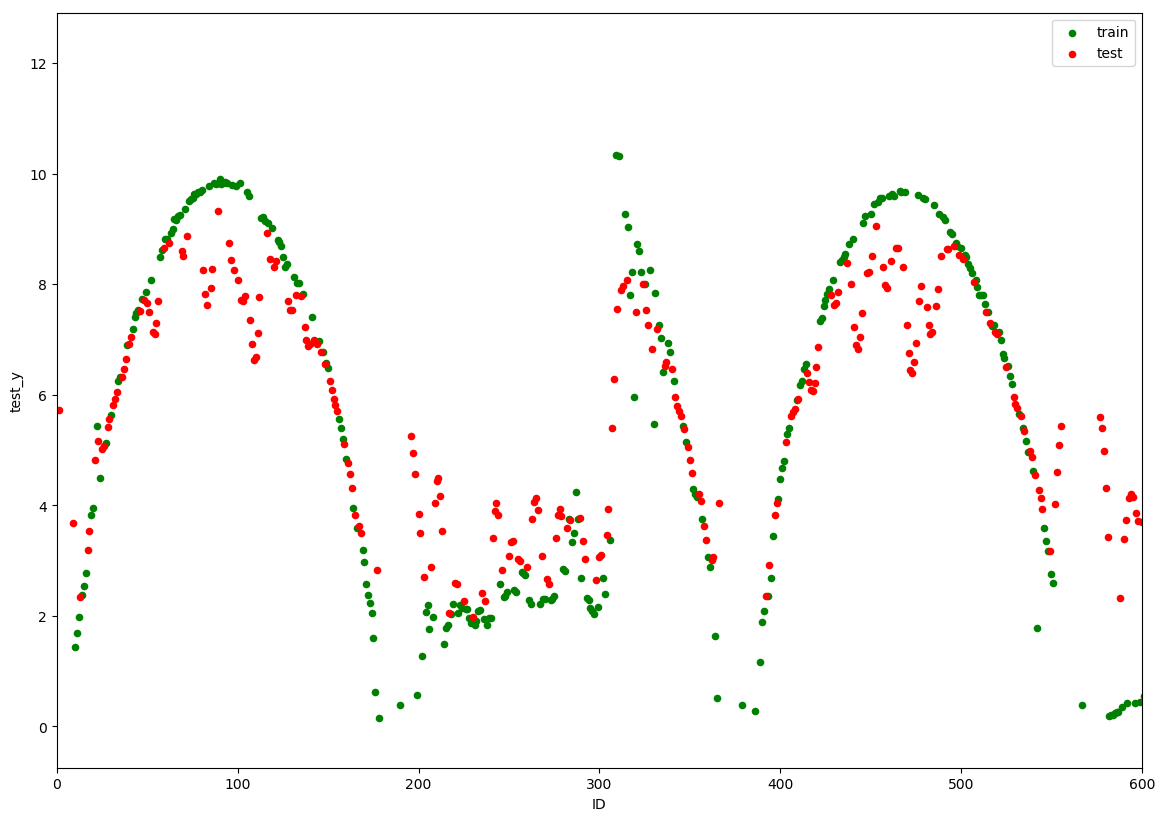

In [55]:
svr_test=pd.DataFrame()
svr_train=pd.DataFrame()

svr_test['ID']=test['ID']
svr_test['test_y']=y_svr


svr_train['ID']=x['ID']
svr_train['train_y']=y['y']

svr_total = pd.concat([svr_train, svr_test],sort=False)
svr_total.sort_values(by=['ID'],ascending=True, inplace=True)



figure(num=None, figsize=(14, 10), dpi=100, facecolor='w', edgecolor='k')

ax = plt.gca()

svr_total.plot.scatter(x='ID',xlim=(0,600),y='train_y',color='green',label='train',ax=ax)
svr_total.plot.scatter(x='ID',xlim=(0,600),y='test_y',color='red',label='test',ax=ax)

plt.show()

In [7]:
#前二后二
next_one = []
prev_one = []
next_id = []
prev_id = []

second_next_one = []
second_prev_one = []

df_len = df.shape[0]

i_y =df.columns.get_loc("y")

def get_prev_nn_index(cur_i):
    prev_i = cur_i-1
    while(prev_i>=0 and pd.isnull(df.iat[prev_i,i_y])):
        prev_i-=1
    return prev_i

def get_next_nn_index(cur_i):
    prev_i = cur_i+1
    while(prev_i<df_len and pd.isnull(df.iat[prev_i,i_y])):
        prev_i+=1
    return prev_i

for i in range(df_len):
    f_pre_i=get_prev_nn_index(i)
    if(f_pre_i)<0:
        prev_one.append(np.nan)
        prev_id.append(0)
    else:
        prev_one.append(df.iat[f_pre_i,i_y])
        prev_id.append(f_pre_i)
        
    s_pre_i=get_prev_nn_index(f_pre_i)
    if (s_pre_i)<0:
        second_prev_one.append(np.nan)
    else:
        second_prev_one.append(df.iat[s_pre_i,i_y])
    
    f_next_i=get_next_nn_index(i)
    if(f_next_i<df_len):
        next_one.append(df.iat[f_next_i,i_y])
        next_id.append(f_next_i)
    else:
        next_one.append(np.nan)
        next_id.append(df_len)
    
    s_next_i=get_next_nn_index(f_next_i)
    if(s_next_i<df_len):
        second_next_one.append(df.iat[s_next_i,i_y])
    else:
        second_next_one.append(np.nan)

In [8]:
df['next_value'] = next_one
df['prev_value'] = prev_one
df['avg_value'] = np.nanmean([df['next_value'], df['prev_value']],axis=0)
df['next_ID'] = next_id
df['prev_ID'] = prev_id
# df['interpolation_ID'] = df['prev_value']+(df['ID']-df['prev_ID'])/(df['next_ID']-df['prev_ID'])*(df['next_value']-df['prev_value'])
# df['interpolation_ls'] = df['prev_value']+(df['light_strength']-df['prev_ls'])/(1+df['next_ls']-df['prev_ls'])*(df['next_value']-df['prev_value'])

df['second_prev_value'] = second_prev_one
df['second_next_value'] = second_next_one
# df['avg_value_four'] = np.nanmean([df['second_next_value'],df['next_value'], df['prev_value'],df['second_prev_value']],axis=0)


# df['rolling_seven'] = df['y'].rolling(7,center=True,min_periods=0).apply(lambda x: np.nanmean(x[[0,1,2,4,5,6]]))
rolling_mask_four = [-i for i in range(1,2)]+[i for i in range(1,2)]
rolling_mask_six = [-i for i in range(1,3)]+[i for i in range(1,3)]
rolling_mask_eight = [-i for i in range(1,4)]+[i for i in range(1,4)]
rolling_mask_ten = [-i for i in range(1,5)]+[i for i in range(1,5)]
# df['rolling_four_y'] = np.nanmean([df['y'].shift(i) for i in rolling_mask_four],axis=0)
# df['rolling_six_y'] = np.nanmean([df['y'].shift(i) for i in rolling_mask_six],axis=0)
df['rolling_eight_y'] = np.nanmean([df['y'].shift(i) for i in rolling_mask_eight],axis=0)

C:\Users\Alex\Anaconda3\envs\python36\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: Mean of empty slice


In [9]:
df['magic_feature'] = df['ID']%190

In [10]:
train = df[df['is_train']==1]
test = df[df['is_train']==0]

In [18]:
params = {
    'boosting_type': 'gbdt',
    'objective': 'regression_l2',
    'metric': 'mse',
    'num_leaves': 31,
    'learning_rate': 0.08,
    'feature_fraction': 0.6,
    'bagging_fraction': 0.8,
    'bagging_freq': 1,
    'verbose': 0
}
# 同样的条件下，此参数设置达到local cv: 0.8575832021441638


test_predicts = []
val_preds = []

# log_test_predicts = []
# log_val_predicts = []
for idx, seed in enumerate([1,2,3,4,5]):
    kf = KFold(5, shuffle=True, random_state=seed)
    
    val_preds.append(np.zeros(train.shape[0]))
    for n_fold, (tra_idx, val_idx) in enumerate(kf.split(train)):
        tra = train.iloc[tra_idx]
        val = train.iloc[val_idx]
        tst = test.copy()

#         grouper = ['bin_ls','bin_env_t','bin_board_t']
#         x = tra.groupby(grouper)['y'].agg({'target_encoding_mean':'mean',
#                                            'target_encoding_max':'max',
#                                            'target_encoding_min':'min',
#                                            'target_encoding_median':'median',
#                                            'target_encoding_var':'var',
#                                            'target_encoding_count':'count'}).reset_index()
#         tra = tra.merge(x, on=grouper, how='left')
#         val = val.merge(x, on= grouper , how ='left')
#         tst = tst.merge(x, on=grouper, how='left')
        predictor = [c for c in tra.columns.tolist() if c not in['y','is_train','I_B','I_C']]

        train_set = lightgbm.Dataset(
            tra[predictor],
            tra['y']
        )

        validation_set = lightgbm.Dataset(
            val[predictor],
            val['y']
        )

        model = lightgbm.train(params, train_set, num_boost_round=5000,
                              valid_sets= [validation_set],
                              valid_names=['valid'],
                              early_stopping_rounds=100,
                               feval=my_val,
                              verbose_eval=500)

        val_preds[idx][val_idx] = model.predict(val[predictor])
        test_predicts.append(model.predict(tst[predictor]))

print('local cv:',1/(1+np.sqrt(mean_squared_error(train['y'],np.mean(val_preds,axis=0)))))

Training until validation scores don't improve for 100 rounds.
[500]	valid's l2: 0.0583624	valid's score: 0.805423
Early stopping, best iteration is:
[856]	valid's l2: 0.0579284	valid's score: 0.806008
Training until validation scores don't improve for 100 rounds.
[500]	valid's l2: 0.0186443	valid's score: 0.87986
Early stopping, best iteration is:
[708]	valid's l2: 0.0181785	valid's score: 0.881191
Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[189]	valid's l2: 0.0125331	valid's score: 0.89932
Training until validation scores don't improve for 100 rounds.
[500]	valid's l2: 0.0391504	valid's score: 0.834819
[1000]	valid's l2: 0.0373976	valid's score: 0.837953
[1500]	valid's l2: 0.0371253	valid's score: 0.838448
Early stopping, best iteration is:
[1550]	valid's l2: 0.0371023	valid's score: 0.83849
Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[249]	valid's l2: 0.015838	valid's score: 

In [19]:
#rolling时泄漏，因此线下达到0.86375，但是线上成绩只有0.7606     保留此CELL
pd.Series(model.feature_importance(importance_type='gain'),
          index=model.feature_name()).sort_values(ascending=False)

P_A                  222039.301672
P_avg                 93066.225161
avg_value             55053.876249
I_A                   50458.812029
P_C                   18252.960175
prev_value             3959.604573
P_B                    3337.084580
rolling_eight_y        2545.606034
light_strength          352.286276
V_A                     213.651252
efficiency_B            195.066844
efficiency              179.940023
second_prev_value       118.857839
efficiency_A            118.097466
wind_direction          103.955159
efficiency_C             95.288066
V_C                      86.683501
next_value               73.774631
board_t                  73.019766
V_B                      68.836425
wind_speed               65.622668
ID                       62.156985
second_next_value        54.536444
env_t                    48.582479
magic_feature            32.142874
next_ID                  19.014852
prev_ID                   3.201813
dtype: float64

In [20]:
test['ans'] = np.mean(test_predicts, axis=0)

C:\Users\Alex\Anaconda3\envs\python36\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [21]:
#rolling时泄漏，因此线下达到0.86375，但是线上成绩只有0.7606
test[['ID','ans']].to_csv('../result/080302_08599.csv',header=False, index=False)